In [ ]:

pip install pandas numpy matplotlib seaborn scikit-learn jupyter missingno

In [15]:
#importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [5]:
#configuracion de estilo para los graficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
# Cargar Datos
train_df = pd.read_csv('/home/mz8k/kaggle-titanic-ml-pipeline/data/train.csv')
test_df = pd.read_csv('/home/mz8k/kaggle-titanic-ml-pipeline/data/test.csv')

In [13]:
# Primer analisis a los datos de entrenamiento
print("DIMENSIONES DE LOS DATOS")
print(f"Dimensiones del Train: , {train_df.shape}")
print(f"Dimensiones del Test: , {test_df.shape}\n")

print("INFORMACION DE LAS COLUMNAS (Train):")
train_df.info()
train_df.head()


DIMENSIONES DE LOS DATOS
Dimensiones del Train: , (891, 12)
Dimensiones del Test: , (418, 11)

INFORMACION DE LAS COLUMNAS (Train):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


VALORES FALTANTES (train): 
          Valores nulos  Porcentaje (%)
Age                 177           19.87
Cabin               687           77.10
Embarked              2            0.22


<function matplotlib.pyplot.show(close=None, block=None)>

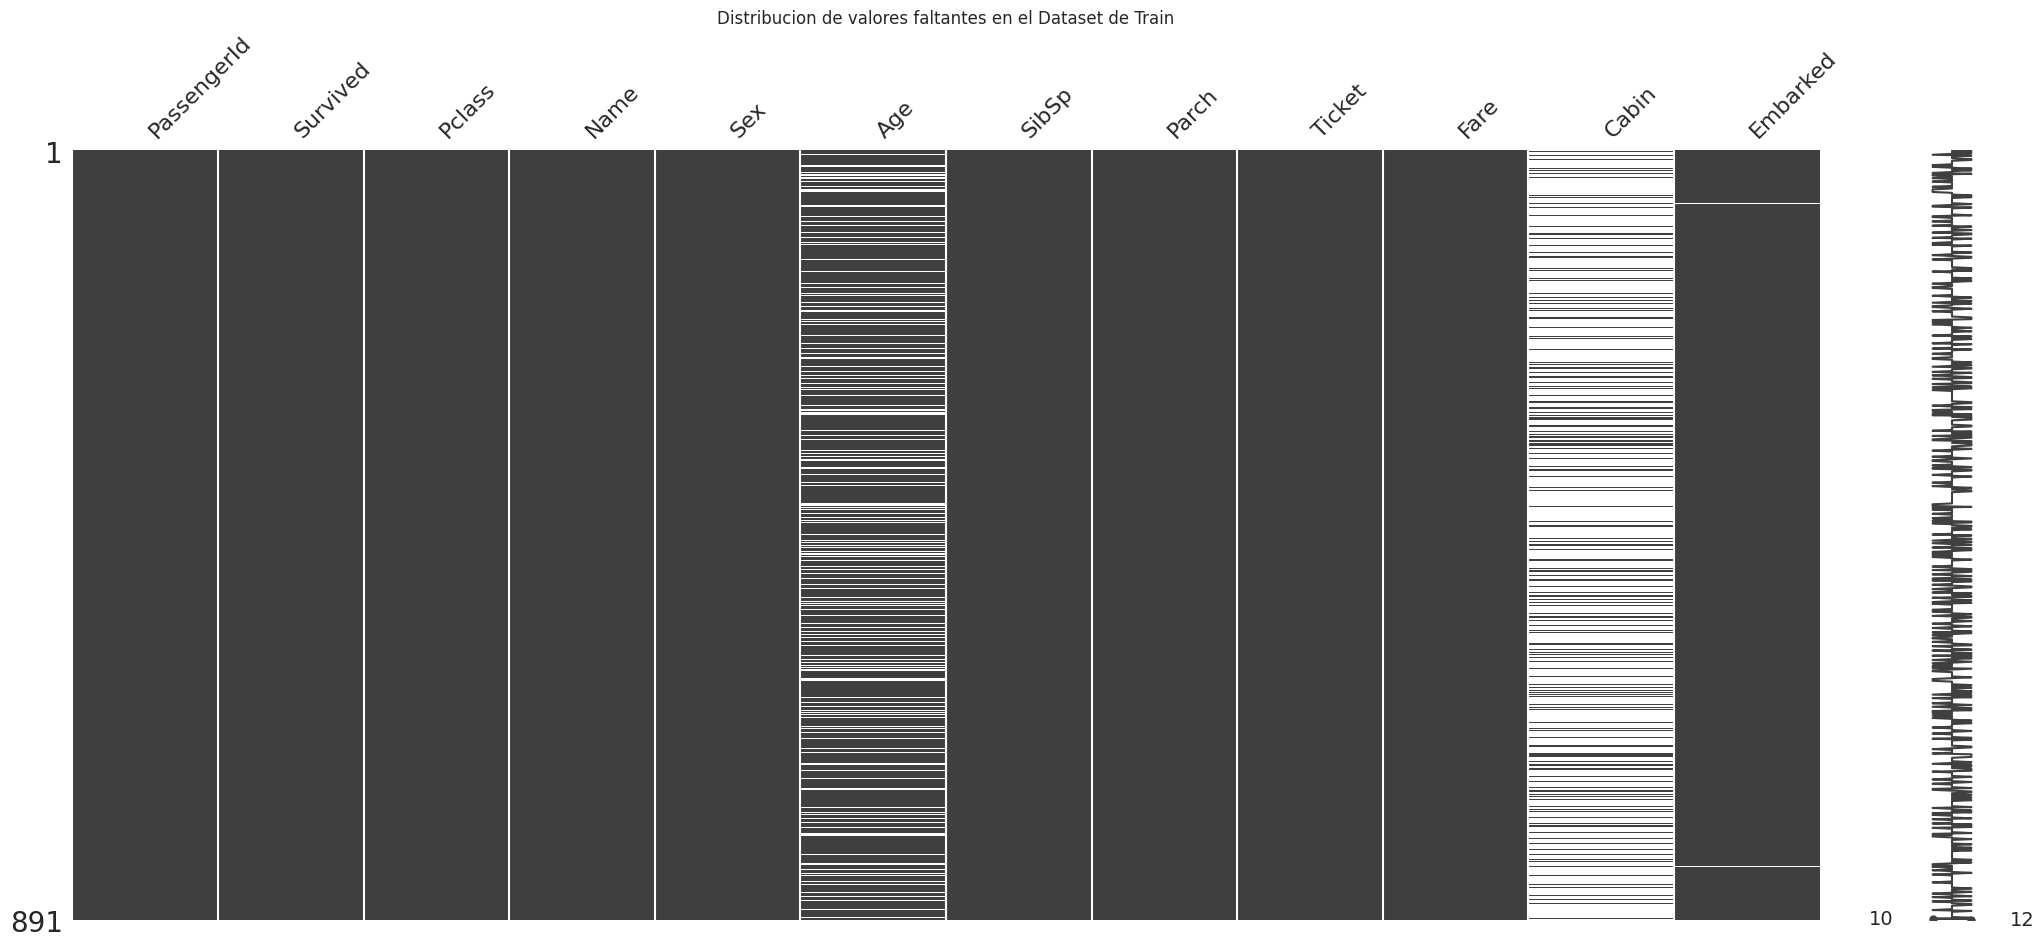

In [16]:
# Analisis de valores nulos (este paso es importante)
print("VALORES FALTANTES (train): ")

# Calculamos el porcentaje de valores nulos por columna
null_sum = train_df.isnull().sum()
null_pct = (train_df.isnull().sum() / train_df.shape[0]) * 100
null_table = pd.DataFrame({'Valores nulos': null_sum, 'Porcentaje (%)': null_pct.round(2)})

#mostramos solo columnas con nulos
print(null_table[null_table['Valores nulos'] > 0])


#Visualizacion de valores nulos
msno.matrix(train_df)
plt.title('Distribucion de valores faltantes en el Dataset de Train')
plt.show

## Análisis de Valores Faltantes

El análisis de valores faltantes en nuestro conjunto de datos del Titanic revela lo siguiente:

* **`Age`**: Esta columna tiene un **19.87%** de datos nulos. Este porcentaje significativo requiere una estrategia de imputacion, como rellenar los valores faltantes con la **mediana** para mantener la distribución de los datos.

* **`Cabin`**: con un **77.10%** de valores nulos, esta columna es casi inútil para el análisis directo. Una estrategia efectiva para aprovechar esta información sería crear una nueva caracteristica binaria llamada **Has_Cabin**, donde `1` indica que el pasajero tenía una cabina asignada y `0` que no.

* **`Embarked`**: esta columna tiene solo el **2%** de valores nulos. Dada esta pequeña cantidad, podemos imputar estos valores facilmente con la **moda** (el valor más frecuente) de la columna.

---
_Este análisis es crucial para la preparación de los datos antes del modelado, ya que garantiza que el algoritmo no se vea afectado por la falta de información ._

---
# ESTADISTICAS DESCRIPTIVAS

In [21]:
# Estadística Descriptiva para variables numéricas
print("ESTADISTICAS DESCRIPTIVAS (Variables numerícas):\n")
print(train_df.describe())

ESTADISTICAS DESCRIPTIVAS (Variables numerícas):

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [24]:
# ESTADÍSTICAS DESCRIPTIVAS (para variables categóricas)
print("ESTADISTÍCAS DESCRIPTIVAS (para variables categóricas):\n")
print(train_df[['Pclass', 'Sex', 'Embarked']].describe())


ESTADISTÍCAS DESCRIPTIVAS (para variables categóricas):

           Pclass
count  891.000000
mean     2.308642
std      0.836071
min      1.000000
25%      2.000000
50%      3.000000
75%      3.000000
max      3.000000


## Estadísticas Descriptivas

Las estadísticas descriptivas nos dan una primera idea de la distribucion de los datos. Por ejemplo, la tarifa promedio (`Fare`) fue de **32.20**, pero con una gran desviacion estandar **49.69**, lo que sugiere una gran disparidad en los precios de los boletos. La edad promedio (`Age`) era de ~30 años

---
# ANALISIS UNIVARIADO (DISTRIBUCION DE VARIABLES INDIVIDUALES)

/tmp/ipykernel_11208/507467730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette="viridis")


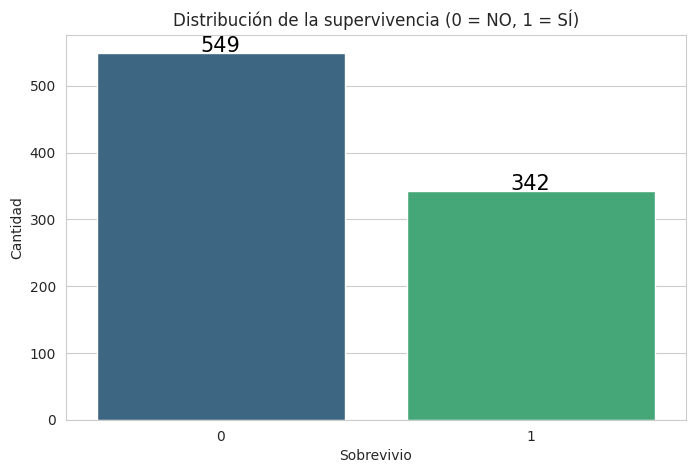

Solo el 38.38% de los pasajeros en el data set de entrenamiento sobrevivo.


In [27]:
# DISTRIBUCION DE LA VARIABLE OBJETIVO 'survived'
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_df, palette="viridis")
plt.title("Distribución de la supervivencia (0 = NO, 1 = SÍ)")
plt.xlabel('Sobrevivio')
plt.ylabel('Cantidad')

# Añadir los numeros en las barras 
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=15, color='black', 
                       xytext=(0, 5), textcoords='offset points')
    
plt.show()
    
survival_pct = (train_df['Survived'].sum() / train_df['Survived'].count()) * 100
print(f"Solo el {survival_pct:.2f}% de los pasajeros en el data set de entrenamiento sobrevivo.")

La variable objetivo `Survived` esta desvalanceada, aproximadamente el `38%`de los pasajeros sobrevivio, mientras que el `62%`no. Esto es importante tenerlo en cuenta para la evaluacion de nuestro modelo.
___

# Análisis Bivariado/Multivariado **(Relacion entre variables)**

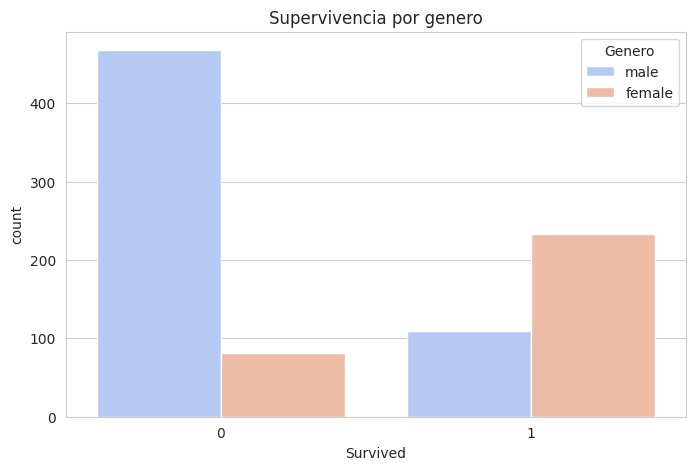

In [29]:
# Supervivencia por sexo 
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', hue='Sex', data=train_df, palette='coolwarm')
plt.title("Supervivencia por genero")
plt.xlabel=("Sobrevivio")
plt.ylabel=("Cantidad")
plt.legend(title='Genero', loc="upper right")
plt.show()

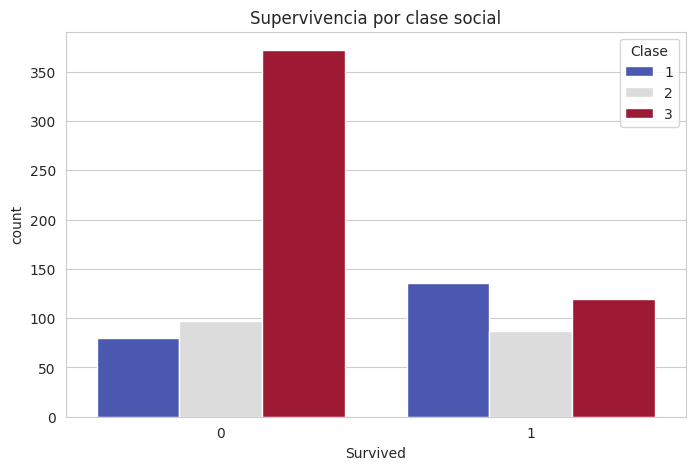

In [33]:
#Supervivencia por clase (Pclass)
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', hue='Pclass', data=train_df, palette='coolwarm')
plt.title("Supervivencia por clase social")
plt.xlabel=("Sobrevivio")
plt.ylabel=("Cantidad")
plt.legend(title='Clase', loc="upper right")
plt.show()

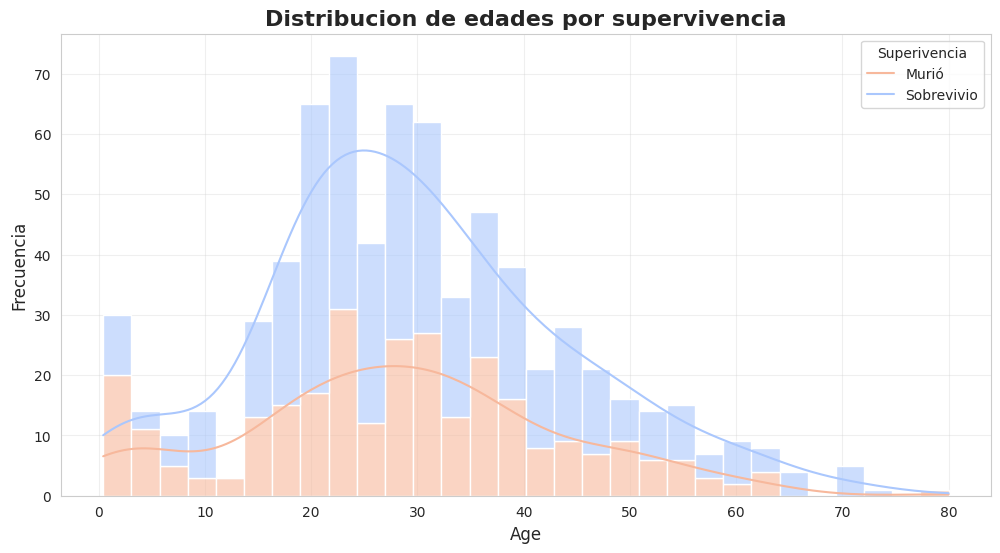

In [40]:

# Distribucion de la edad de supervivencia
plt.figure(figsize=(12, 6))

import importlib
importlib.reload(plt)
# Usamos .dropna() para evitar errores con los valores nulos en 'Age'
sns.histplot(data=train_df.dropna(subset=['Age']), 
             x='Age', 
             hue='Survived', 
             kde=True, 
             palette="coolwarm",
             bins=30, 
             alpha=0.6,
             multiple="stack")

plt.title("Distribucion de edades por supervivencia", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Superivencia', labels=['Murió', 'Sobrevivio'], loc='upper right')
plt.grid(alpha=0.3)
plt.show()

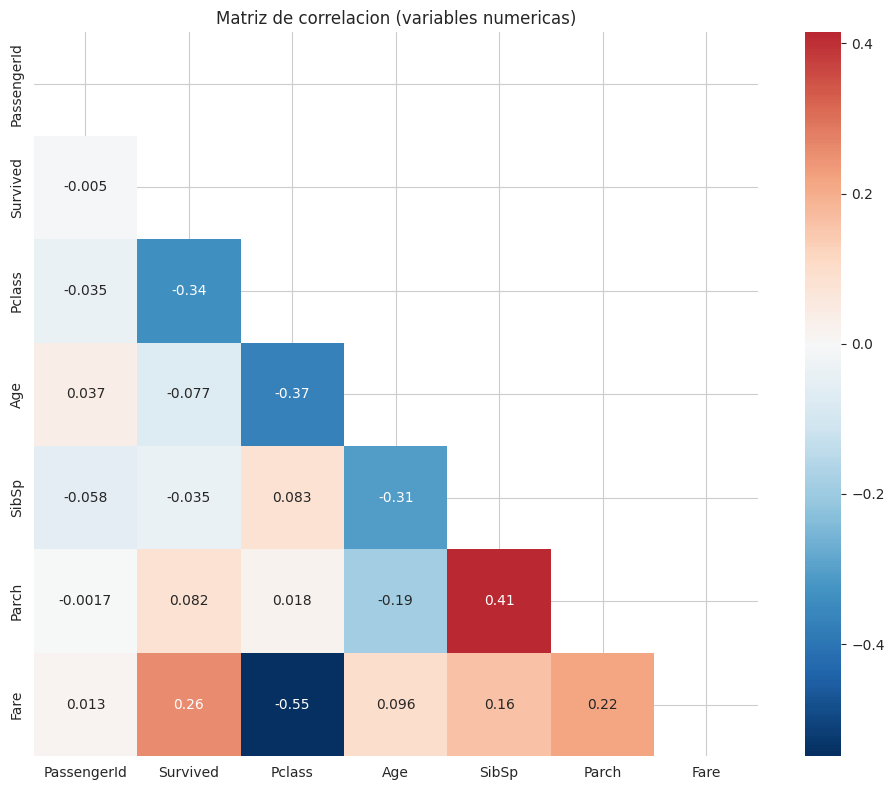

In [42]:
# Matriz de Correlación (solo para variables numericas)
plt.figure(figsize=(10, 8))

# Seleccionamos solo las columnas numericas para la correlación
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
corr_matrix = train_df[numeric_cols].corr()

# Creamos una mascara para mostrar sola la mitad inferior del triangulo
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, square=True)
plt.title("Matriz de correlacion (variables numericas)")
plt.tight_layout()
plt.show()

# Análisis de supervivencia por Genero y Clase:

* **GENERO:** La probabilidad de supervivencia fue abrumadoramente mayor para las mujeres. Estees el factor más predictivo a simple vista, lo que coincide con el protocolo de "mujeres y nios primero".

* **CLASE SOCIAL:** Los pasajeros de primera clase `Pclass = 1` tuvieron una tasa de supervivencia significativamente mayor que los de segunda y tercera clase. La clase social, que a menudo se correlaciona con la cubierta del barco en la que se encontraban los pasajeros, fue un factor muy critico.

* **EDAD:** Los niños pequeños **(edad < 10)** parecen haber tenido una tasa de supervivencia más alta, lo que respalda el protocolo de evacuación. La distribucion para los adultos es más uniforme.

### **MATRIZ DE CORRELACION**

* Se observa una correlación positiva moderada entre `Fare` (tarifa) y `Pclass` (-0.55, pero hay que recordar que `Pclass = 1` es la clase más alta, de ahi la correlacion negativa). Esto tiene sentido: una tarifa más alta compraba una mejor clase.

* `Pclass` tiene la correlacion negativa más fuerte con `Survived` **(-0.34)** confirmando que una clase más alta (numero más bajo) aumenta la probabilidad de supervivencia.

* `Fare` tiene una correlacion positivadebil con `survived` (0.26)
___